In [ ]:
# алгоритм k ближайших соседей

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

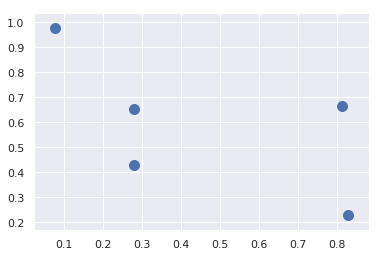

In [74]:
# генерируем данные вершин
n = 5
X = np.random.rand(n,2)
plt.scatter(X[:,0], X[:,1], s=100)

In [75]:
# вычисляем матрицу квадратов расстояний
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.05003144, 0.3413193 , 0.33978149, 0.3374784 ],
       [0.05003144, 0.        , 0.48012894, 0.28469348, 0.14415219],
       [0.3413193 , 0.48012894, 0.        , 0.18812066, 1.11872276],
       [0.33978149, 0.28469348, 0.18812066, 0.        , 0.63907752],
       [0.3374784 , 0.14415219, 1.11872276, 0.63907752, 0.        ]])

In [76]:
# диагональная матрица должна быть равно 0
dist_sq.diagonal()

array([0., 0., 0., 0., 0.])

In [99]:
#  
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[1, 0, 4, 3, 2],
       [1, 0, 4, 3, 2],
       [3, 2, 0, 1, 4],
       [3, 2, 1, 0, 4],
       [1, 4, 0, 3, 2]])

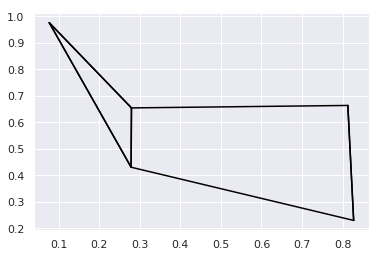

In [100]:
# связываем каждую точку с ее ближайшими двумя соседями
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')